In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nlopt

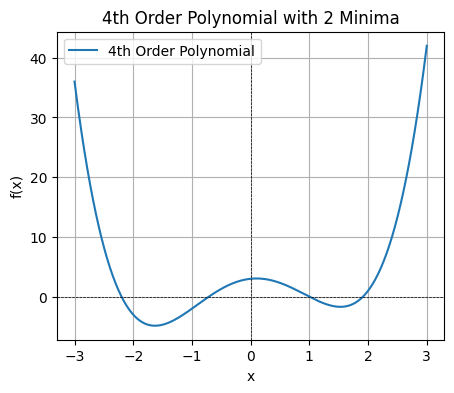

In [2]:
# Define the 4th order polynomial function
def polynomial(x):
    return x**4 - 5*x**2 + x + 3

# Generate x values
x = np.linspace(-3, 3, 500)

# Plot the polynomial
fig, ax = plt.subplots(1,1,figsize=(5, 4))
ax.plot(x, polynomial(x), label='4th Order Polynomial')
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_title("4th Order Polynomial with 2 Minima")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
plt.show()

In [3]:
# Define the objective function
def objective(x, grad):
    if grad.size > 0:
        grad[0] = 4 * x[0]**3 - 10 * x[0] + 1  # Gradient of the polynomial
    return x[0]**4 - 5 * x[0]**2 + x[0] + 3  # Polynomial function

# Create an optimizer object
opt = nlopt.opt(nlopt.LD_MMA, 1)  # LD_MMA for Method of Moving Asymptotes

# Set the objective function
opt.set_min_objective(objective)
# Set relative tolerance
opt.set_xtol_rel(1e-6)

# Set bounds
x_min = [-2.0]
x_max = [2.0]
opt.set_lower_bounds(x_min)
opt.set_upper_bounds(x_max)

# Set initial guess
x0 = [0.0]

# Optimize
x_opt = opt.optimize(x0)
min_f = opt.last_optimum_value()

print(f"Optimal solution: x = {x_opt[0]}")
print(f"Minimum value of the polynomial: f(x) = {min_f}")

Optimal solution: x = -1.6289484031379848
Minimum value of the polynomial: f(x) = -4.855394472077242


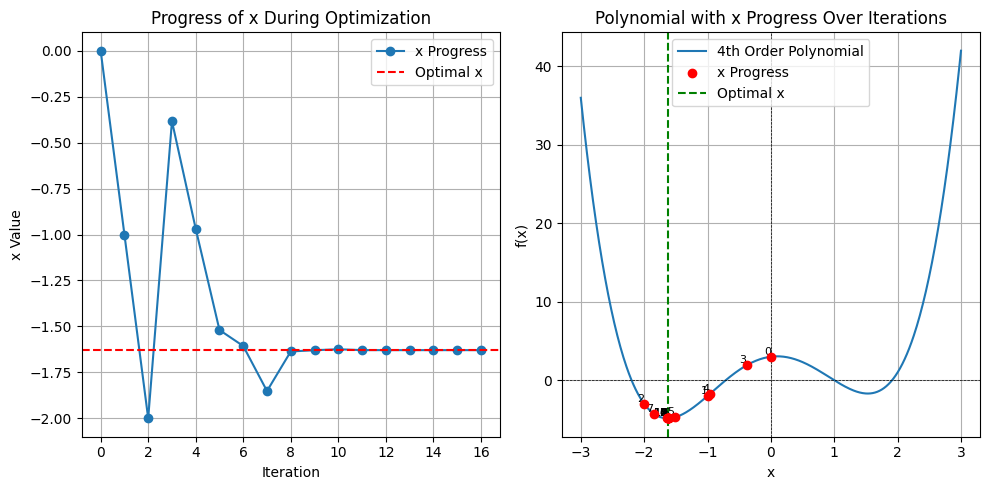

Optimal solution: x = -1.6289484031379848
Minimum value of the polynomial: f(x) = -4.855394472077242


In [4]:
# List to store the progress of x during optimization
x_progress = []

# Define a callback function to record x values
def progress_callback(x, grad):
    x_progress.append(x[0])
    return objective(x, grad)

# Set the callback function in the optimizer
opt.set_min_objective(progress_callback)

# Re-run the optimization
x_progress.clear()  # Clear previous progress
x_opt = opt.optimize(x0)
min_f = opt.last_optimum_value()

# Create subplots for the two plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the progress of x
axs[0].plot(x_progress, marker='o', linestyle='-', label='x Progress')
axs[0].axhline(x_opt[0], color='red', linestyle='--', label='Optimal x')
axs[0].set_title("Progress of x During Optimization")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("x Value")
axs[0].legend()
axs[0].grid()

# Plot the polynomial and overlay the x values over iterations
for i, xi in enumerate(x_progress):
    axs[1].text(xi, polynomial(np.array([xi])), f'{i}', fontsize=8, ha='right', va='bottom')
axs[1].plot(x, polynomial(x), label='4th Order Polynomial')
axs[1].scatter(x_progress, [polynomial(np.array([xi])) for xi in x_progress], color='red', label='x Progress', zorder=5)
axs[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axs[1].axvline(x_opt[0], color='green', linestyle='--', label='Optimal x')
axs[1].set_title("Polynomial with x Progress Over Iterations")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

print(f"Optimal solution: x = {x_opt[0]}")
print(f"Minimum value of the polynomial: f(x) = {min_f}")

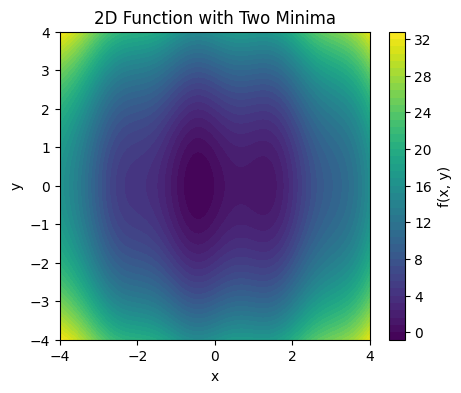

In [5]:
# Define the 2D function with two minima
def two_minima_function(x, y):
    return (x**2 + y**2) + np.sin(3 * x)

# Generate the Z values for the function
X, Y = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = two_minima_function(X, Y)

# Plot the 2D function
fig, ax = plt.subplots(figsize=(5, 4))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
ax.set_title("2D Function with Two Minima")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, ax=ax, label="f(x, y)")
plt.show()

In [6]:
# Define the 2D objective function
def objective_2d(x, grad):
    if grad.size > 0:
        grad[0] = 2 * x[0] + 3 * np.cos(3 * x[0])  # Partial derivative with respect to x
        grad[1] = 2 * x[1]  # Partial derivative with respect to y
    return (x[0]**2 + x[1]**2) + np.sin(3 * x[0])  # The 2D function

# Create an optimizer object for 2D optimization
opt_2d = nlopt.opt(nlopt.LD_MMA, 2)  # LD_MMA for Method of Moving Asymptotes

# Set the objective function
opt_2d.set_min_objective(objective_2d)

# Set relative tolerance
opt_2d.set_ftol_rel(1e-6)  # Set function tolerance
opt_2d.set_xtol_rel(1e-6)

# Set bounds for x and y
x_min_2d = [-3.0, -3.0]
x_max_2d = [3.0, 3.0]
opt_2d.set_lower_bounds(x_min_2d)
opt_2d.set_upper_bounds(x_max_2d)

# Set initial guess
x0_2d = [2.0, 2.0]

# Optimize
x_opt_2d = opt_2d.optimize(x0_2d)
min_f_2d = opt_2d.last_optimum_value()

print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")

Optimal solution: x = -0.4273072141725788, y = 3.6864036766708986e-06
Minimum value of the 2D function: f(x, y) = -0.775973599953111


Progress of solutions (x, y):
Iteration 0: x = 2.0, y = 2.0
Iteration 1: x = -0.40836869667899656, y = -0.25
Iteration 2: x = -0.7462339770636063, y = 0.40567758283968613
Iteration 3: x = -0.4592787286534867, y = -0.12861458231494977
Iteration 4: x = 0.12675119485079794, y = 0.3503533341339103
Iteration 5: x = -0.37384973168496255, y = -0.06369300005913653
Iteration 6: x = -0.4402498938819425, y = -0.04792654039897528
Iteration 7: x = -0.42720257499221487, y = -0.03884994347186332
Iteration 8: x = -0.4277245374616707, y = -0.0037798122216831653
Iteration 9: x = -0.41773122341148866, y = 0.04508536669623429
Iteration 10: x = -0.42671287289050464, y = 0.0012814801171740099
Iteration 11: x = -0.4276153096641763, y = 0.00020583506910108198
Iteration 12: x = -0.4272879222478616, y = 8.458716800201748e-05
Iteration 13: x = -0.427306408297268, y = 4.11821925954357e-05
Iteration 14: x = -0.4273129485072537, y = -0.00026307058548096613
Iteration 15: x = -0.4273072141725788, y = 3.68640367667089

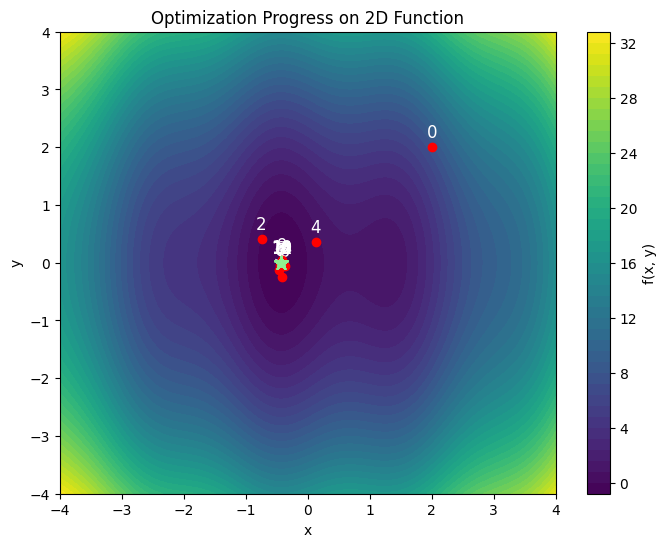

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# List to store the progress of x and y during optimization
xy_progress = []

# Define a callback function to record x and y values
def progress_callback_2d(x, grad):
    xy_progress.append((x[0], x[1]))
    return objective_2d(x, grad)

# Set the callback function in the optimizer
opt_2d.set_min_objective(progress_callback_2d)

# Re-run the optimization
xy_progress.clear()  # Clear previous progress
x_opt_2d = opt_2d.optimize(x0_2d)
min_f_2d = opt_2d.last_optimum_value()

# Print the progress history
print("Progress of solutions (x, y):")
for i, (x, y) in enumerate(xy_progress):
    print(f"Iteration {i}: x = {x}, y = {y}")

# Print the final optimal solution
print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")


# Plot the solutions history on the contour plot
# Compute X, Y, Z for the 2D function
X, Y = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = (X**2 + Y**2) + np.sin(3 * X)
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
ax.set_title("Optimization Progress on 2D Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, ax=ax, label="f(x, y)")

# Overlay the progress of solutions
for i, (x, y) in enumerate(xy_progress):
    ax.text(x, y + 0.1, str(i), fontsize=12, ha='center', va='bottom', color='white', zorder=3)
    ax.scatter(x_opt_2d[0], x_opt_2d[1], color='lightgreen', marker='*', s=100, label='Optimal Point', zorder=7)
ax.scatter(*zip(*xy_progress), color='red', label='Solution Progress', zorder=3)

plt.show()


### Wrap LD_MMA (Local Methods of Moving Asymptote) with Augmented Lagrangian (AUGLAG)

In [8]:
# Define the 2D objective function
def objective_2d(x, grad):
    if grad.size > 0:
        grad[0] = 2 * x[0] + 3 * np.cos(3 * x[0])  # Partial derivative with respect to x
        grad[1] = 2 * x[1]  # Partial derivative with respect to y
    return (x[0]**2 + x[1]**2) + np.sin(3 * x[0])  # The 2D function

# Create an optimizer object for 2D optimization
base = nlopt.opt(nlopt.LD_MMA, 2)  # LD_MMA for Method of Moving Asymptotes
base.set_ftol_rel(1e-6)  # Set function tolerance
base.set_xtol_rel(1e-6)  # Set variable tolerance

opt_2d = nlopt.opt(nlopt.AUGLAG, 2)
opt_2d.set_min_objective(objective_2d)
# Set bounds for x and y
x_min_2d = [-3.0, -3.0]
x_max_2d = [3.0, 3.0]
opt_2d.set_lower_bounds(x_min_2d)
opt_2d.set_upper_bounds(x_max_2d)
opt_2d.set_local_optimizer(base)


# Set bounds for x and y
x_min_2d = [-3.0, -3.0]
x_max_2d = [3.0, 3.0]
opt_2d.set_lower_bounds(x_min_2d)
opt_2d.set_upper_bounds(x_max_2d)

# Set initial guess
x0_2d = [2.0, 2.0]

# Optimize
x_opt_2d = opt_2d.optimize(x0_2d)
min_f_2d = opt_2d.last_optimum_value()

print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")

Optimal solution: x = -0.4273072141725788, y = 3.6864036766708986e-06
Minimum value of the 2D function: f(x, y) = -0.775973599953111


Progress of solutions (x, y):
Iteration 0: x = 2.0, y = 2.0
Iteration 1: x = -0.40836869667899656, y = -0.25
Iteration 2: x = -0.7462339770636063, y = 0.40567758283968613
Iteration 3: x = -0.4592787286534867, y = -0.12861458231494977
Iteration 4: x = 0.12675119485079794, y = 0.3503533341339103
Iteration 5: x = -0.37384973168496255, y = -0.06369300005913653
Iteration 6: x = -0.4402498938819425, y = -0.04792654039897528
Iteration 7: x = -0.42720257499221487, y = -0.03884994347186332
Iteration 8: x = -0.4277245374616707, y = -0.0037798122216831653
Iteration 9: x = -0.41773122341148866, y = 0.04508536669623429
Iteration 10: x = -0.42671287289050464, y = 0.0012814801171740099
Iteration 11: x = -0.4276153096641763, y = 0.00020583506910108198
Iteration 12: x = -0.4272879222478616, y = 8.458716800201748e-05
Iteration 13: x = -0.427306408297268, y = 4.11821925954357e-05
Iteration 14: x = -0.4273129485072537, y = -0.00026307058548096613
Iteration 15: x = -0.4273072141725788, y = 3.68640367667089

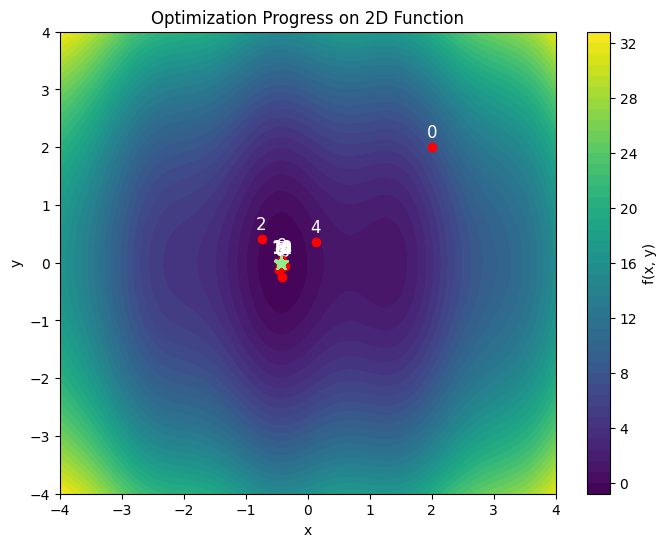

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# List to store the progress of x and y during optimization
xy_progress = []

# Define a callback function to record x and y values
def progress_callback_2d(x, grad):
    xy_progress.append((x[0], x[1]))
    return objective_2d(x, grad)

# Set the callback function in the optimizer
opt_2d.set_min_objective(progress_callback_2d)

# Re-run the optimization
xy_progress.clear()  # Clear previous progress
x_opt_2d = opt_2d.optimize(x0_2d)
min_f_2d = opt_2d.last_optimum_value()

# Print the progress history
print("Progress of solutions (x, y):")
for i, (x, y) in enumerate(xy_progress):
    print(f"Iteration {i}: x = {x}, y = {y}")

# Print the final optimal solution
print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")


# Plot the solutions history on the contour plot
# Compute X, Y, Z for the 2D function
X, Y = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
Z = (X**2 + Y**2) + np.sin(3 * X)
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
ax.set_title("Optimization Progress on 2D Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, ax=ax, label="f(x, y)")

# Overlay the progress of solutions
for i, (x, y) in enumerate(xy_progress):
    ax.text(x, y + 0.1, str(i), fontsize=12, ha='center', va='bottom', color='white', zorder=3)
    ax.scatter(x_opt_2d[0], x_opt_2d[1], color='lightgreen', marker='*', s=100, label='Optimal Point', zorder=7)
ax.scatter(*zip(*xy_progress), color='red', label='Solution Progress', zorder=3)

plt.show()


In [10]:
# Objective: f(x,y) = (1 - x)^2 + 100*(y - x^2)^2
def f_obj(x, grad):
    x1, x2 = x
    if grad.size > 0:
        # df/dx1 = 2(x-1) - 400 x (y - x^2)
        grad[0] = 2.0*(x1 - 1.0) - 400.0*x1*(x2 - x1**2)
        # df/dx2 = 200 (y - x^2)
        grad[1] = 200.0*(x2 - x1**2)
    return (1.0 - x1)**2 + 100.0*(x2 - x1**2)**2

# Define equality constraints x1 + x2 - 1 = 0
def equality_constraint(x, grad):
    # c1(x) = x1 + x2 - 1 = 0
    if grad.size > 0:
        # grad is a flattened array, so we set gradients for both constraints
        # grad[0] and grad[1] for c1, grad[2] and grad[3] for c2
        grad[0] = 1.0  # dc1/dx1
        grad[1] = 1.0  # dc1/dx2
    return x[0] + x[1] - 1.0

# Define equality constraints x1**2 + x2**2 - 1.0*x1 <= 0
def inequality_constraint(x, grad):
    # c1(x) = x1**2 + x2**2 - 4*x1 <= 0
    if grad.size > 0:
        grad[0] = 2.0*x[0] - 1.0
        grad[1] = 2.0*x[1]
    return x[0]**2 + x[1]**2 - 1.0*x[0]
    

# Set up the optimizer
base = nlopt.opt(nlopt.LD_MMA, 2)
base.set_ftol_rel(1e-4)
base.set_xtol_rel(1e-4)

opt_aug = nlopt.opt(nlopt.AUGLAG, 2)
opt_aug.set_min_objective(f_obj)
opt_aug.set_local_optimizer(base)
opt_aug.set_lower_bounds([-5.0, -5.0])
opt_aug.set_upper_bounds([5.0, 5.0])

opt_aug.add_equality_constraint(equality_constraint, 1e-4)
opt_aug.add_inequality_constraint(inequality_constraint, 1e-4)

x0_aug = [4.0, 4.0]
x_opt_aug = opt_aug.optimize(x0_aug)
min_f_aug = opt_aug.last_optimum_value()

print(f"Optimal solution with equality constraint: x = {x_opt_aug[0]}, y = {x_opt_aug[1]}")
print(f"Minimum value of f_obj: f(x, y) = {min_f_aug}")

Optimal solution with equality constraint: x = 0.6187930090937788, y = 0.3812069909062213
Minimum value of f_obj: f(x, y) = 0.145607021448028


Progress of solutions (x, y):
Iteration 0: x = 4.0, y = 4.0
Iteration 100: x = 0.6220196782628087, y = 0.38474464276355896
Iteration 200: x = 0.6187931885699993, y = 0.3812071972963028
Iteration 300: x = 0.618792965431825, y = 0.38120694069583577
Iteration 400: x = 0.7277359341590302, y = 0.42863134715027223
Optimal solution: x = 0.6187930090937788, y = 0.3812069909062213
Minimum value of the 2D function: f(x, y) = 0.145607021448028


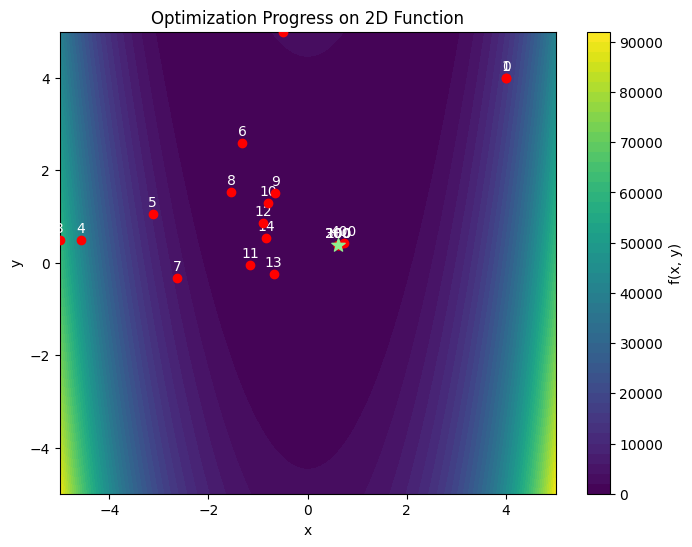

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# List to store the progress of x and y during optimization
xy_progress = []

# Define a callback function to record x and y values
def progress_callback_2d(x, grad):
    xy_progress.append((x[0], x[1]))
    return f_obj(x, grad)

# Set the callback function in the optimizer
opt_aug.set_min_objective(progress_callback_2d)

# Re-run the optimization
x0_2d = x0_aug
xy_progress.clear()  # Clear previous progress
x_opt_2d = opt_aug.optimize(x0_2d)
min_f_2d = opt_aug.last_optimum_value()

# Print the progress history
print("Progress of solutions (x, y):")
for i, (x, y) in enumerate(xy_progress):
    if i%100==0:
        print(f"Iteration {i}: x = {x}, y = {y}")

# Print the final optimal solution
print(f"Optimal solution: x = {x_opt_2d[0]}, y = {x_opt_2d[1]}")
print(f"Minimum value of the 2D function: f(x, y) = {min_f_2d}")


# Plot the solutions history on the contour plot
# Compute X, Y, Z for the 2D function
X, Y = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = (1 - X)**2 + 100*(Y - X**2)**2
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
ax.set_title("Optimization Progress on 2D Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, ax=ax, label="f(x, y)")

# Overlay the progress of solutions
for i, (x, y) in enumerate(xy_progress):
    if (i % 100 == 0)|(i<15):
        ax.text(x, y + 0.1, str(i), fontsize=10, ha='center', va='bottom', color='white', zorder=3)
ax.scatter(x_opt_2d[0], x_opt_2d[1], color='lightgreen', marker='*', s=100, label='Optimal Point', zorder=7)
ax.scatter(*zip(*[(x, y) for i, (x, y) in enumerate(xy_progress) if ((i % 100 == 0)|(i<15))]), color='red', label='Solution Progress', zorder=3)

plt.show()


In [12]:
x_opt, y_opt = x_opt_2d
print('check constraints at optimal solution:')
print("Constraint 1 satisfied:", "YES" if np.isclose(equality_constraint(x_opt_2d, np.zeros(2)), 0.0) else "NO")
print("Constraint 2 satisfied:", "YES" if inequality_constraint(x_opt_2d, np.zeros(2)) <= 0.0 else "NO")

check constraints at optimal solution:
Constraint 1 satisfied: YES
Constraint 2 satisfied: YES


### Advantages of combining Augmented Lagrangian (AUGLAG) & Methods of Moving Asymptote (LD_MMA)
- Ability to implement equalities constraints directly (via AUGLAG). Recall: if using MMA alone, we need to break equality constraint into 2 inequalities constraints.
- Robustness to scaling/conflicts: If constraints fight each other or are poorly scaled, AUGLAG’s multiplier/penalty updates adapt better than a pure penalty or ad-hoc MMA setup.
- Ability to tune tolerance separately:
    - Tune outer-tolerance for constraints (via AUGLAG optimization)
    - Tune inner-tolerance for sub-problem solver (via LD_MMA optimization)
- Most importantly, AUGLAG+LD_MMA will make sure that the 'optimal' solutions will satisfy constraints with high accuracy! In other words, optimal solutions found by AUGLAG+LD_MMA will definitely be feasible w.r.t constraints.
    - MMA alone: try to find optimal solution with O.K. mindset of missing constraints by a bit
    - AUGLAG+MMA: find optimal solution that will align very well with constraints!
- Mathematically, AUGLAG+MMA:
    - calls inner optimizer (MMA) to minimize augmented Lagrangian
    - outer-update: after finding the next optimal solution, it looks for constraints violations. If a constraint is violated, then increase $\lambda_i$ so that it makes next inner optimizing task works harder. On the other hand, if constraint is satisfied, it relaxes things by a bit and focus on optimizing objective.

In [13]:
inequality_constraint(x_opt_2d, np.zeros(2))

np.float64(-0.09056945107466952)